<AxesSubplot: >

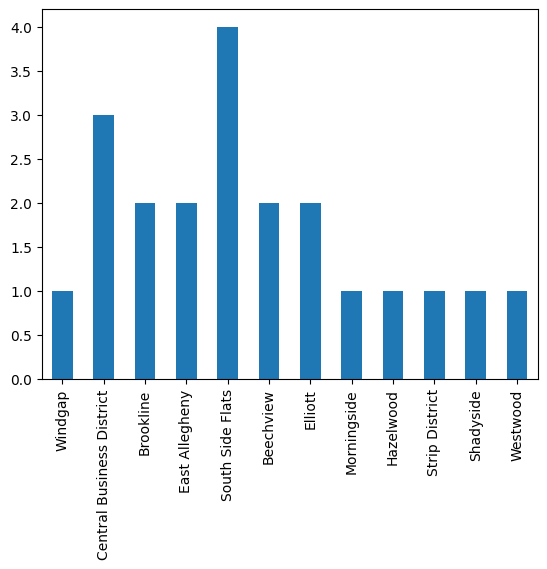

In [9]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Polygon, LineString, Point
from matplotlib import pyplot as plt

fishFryData = pd.read_csv('fishfry.csv')

# make dictionary
frypoints = dict()
lunchpoints = dict()
dataWaterFeatures = pd.read_csv('water-features.csv')

# make dictionary
dataPlumbers = pd.read_csv('plumbers_employment.csv')

# make dictionary
geoneighbor = gp.read_file('neighborhood.json')

neighborhoods = dataPlumbers['Neighborhood']

gs = gp.GeoDataFrame(geoneighbor)

for i,r in fishFryData.iterrows():
    lalo = Point(r['longitude'], r['latitude'])
    count = 0
    for p in gs.geometry:
        tf = lalo.within(p)
        if tf:
            n = geoneighbor['hood'][count]
            if n not in frypoints:
                frypoints[n] = 0
                lunchpoints[n] = 0
            if r['lunch']:
                lunchpoints[n] += 1
            frypoints[n] += 1
            break
        count+=1
fryd = pd.Series(frypoints)
fryd.sort_values(ascending=True)
lunchd = pd.Series(lunchpoints)
lunchd.sort_values(ascending=True)
fryd.plot(kind='bar')

<AxesSubplot: >

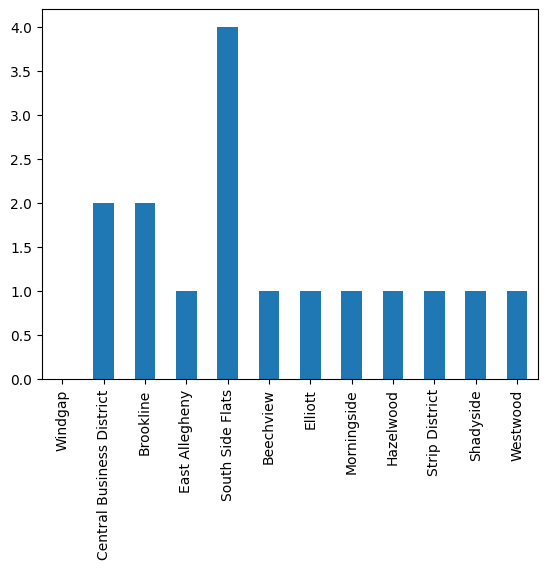

In [10]:
lunchd.plot(kind='bar')

<AxesSubplot: >

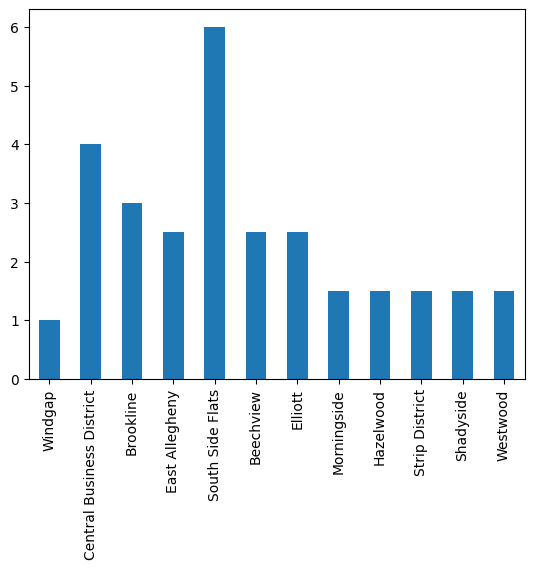

In [12]:
for i in frypoints:
    frypoints[i] += lunchpoints[i] * .5
fryd = pd.Series(frypoints)
fryd.plot(kind='bar')